# Working with Time Series Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import vega_datasets

## SF Temps

In [24]:
df = vega_datasets.data.sf_temps()

In [25]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [26]:
df = df.set_index('date')

In [29]:
pd.Timedelta('1d')

Timedelta('1 days 00:00:00')

<AxesSubplot:title={'center':'Average Daily Temperature'}, xlabel='date'>

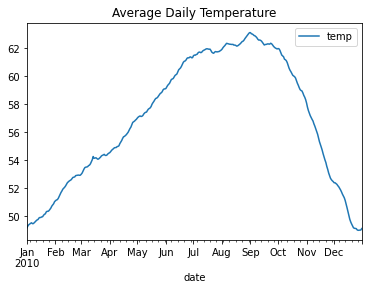

In [4]:
df.resample('D').mean().plot(title='Average Daily Temperature')

<AxesSubplot:title={'center':'Minimum Daily Temperature'}, xlabel='date'>

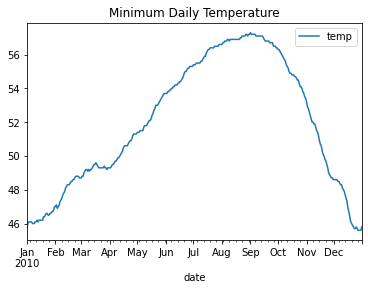

In [5]:
df.resample('D').min().plot(title='Minimum Daily Temperature')

<AxesSubplot:title={'center':'Maximum Daily Temperature'}, xlabel='date'>

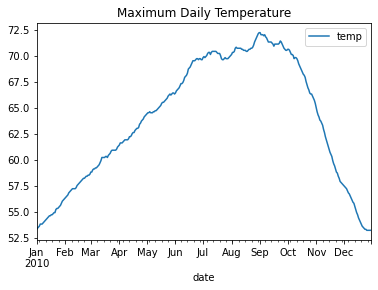

In [6]:
df.resample('D').max().plot(title='Maximum Daily Temperature')

Which month is the coldest? Which month has the highest average temperature?

In [31]:
df['month'] = df.index.strftime('%m-%b')

In [8]:
df.groupby('month').temp.mean().sort_values()

month
01-Jan    49.984140
12-Dec    50.498253
02-Feb    52.243899
03-Mar    53.956528
11-Nov    55.185139
04-Apr    55.633056
05-May    57.970968
10-Oct    60.253091
06-Jun    60.444722
07-Jul    61.765457
08-Aug    62.405376
09-Sep    62.487083
Name: temp, dtype: float64

In [56]:
# change in temp by day
daily = df.resample('D').temp.agg(['min', 'max'])
daily['temp_change'] = daily['max'] - daily['min']
daily['month'] = daily.index.strftime('%m-%b')
daily.groupby('month').temp_change.max().sort_values().tail()

month
10-Oct    14.4
06-Jun    14.8
07-Jul    14.8
09-Sep    14.9
08-Aug    15.0
Name: temp_change, dtype: float64

<AxesSubplot:xlabel='date'>

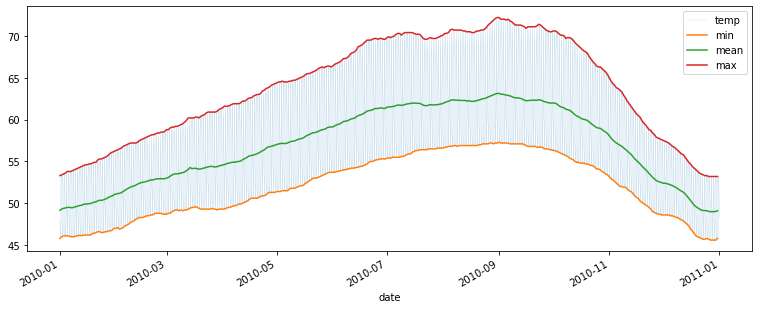

In [45]:
# NB. be careful of multi indexes and aggregating series vs dataframes
ax = df.plot(alpha=.5, figsize=(13, 5), lw=.2)
df.resample('D').temp.agg(['min', 'mean', 'max']).plot(ax=ax)

<AxesSubplot:xlabel='date', ylabel='value'>

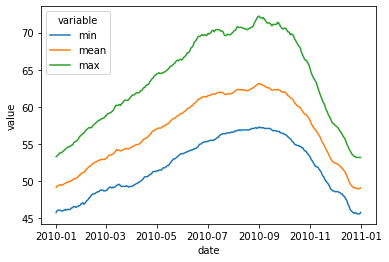

In [10]:
daily = df.resample('D').temp.agg(['min', 'mean', 'max'])
daily = daily.reset_index().melt(id_vars=['date'])
sns.lineplot(data=daily, x='date', y='value', hue='variable')

## Seattle Weather

In [71]:
df.index.strftime('%m-%b')

Index(['01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan',
       '01-Jan', '01-Jan', '01-Jan',
       ...
       '12-Dec', '12-Dec', '12-Dec', '12-Dec', '12-Dec', '12-Dec', '12-Dec',
       '12-Dec', '12-Dec', '12-Dec'],
      dtype='object', name='date', length=1461)

In [72]:
df.index.strftime('%w-%a')

Index(['0-Sun', '1-Mon', '2-Tue', '3-Wed', '4-Thu', '5-Fri', '6-Sat', '0-Sun',
       '1-Mon', '2-Tue',
       ...
       '2-Tue', '3-Wed', '4-Thu', '5-Fri', '6-Sat', '0-Sun', '1-Mon', '2-Tue',
       '3-Wed', '4-Thu'],
      dtype='object', name='date', length=1461)

In [64]:
df = vega_datasets.data.seattle_weather()
df = df.set_index('date')
df['month'] = df.index.strftime('%m-%b')
df['year'] = df.index.year
df.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,01-Jan,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,01-Jan,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,01-Jan,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,01-Jan,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,01-Jan,2012


In [63]:
# Highest precipitation
df.resample('M').precipitation.sum().sort_values().tail()

date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

<AxesSubplot:title={'center':'Monthly Precipitation'}, xlabel='date'>

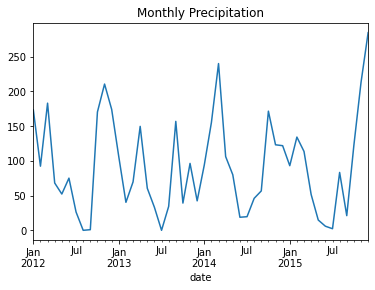

In [73]:
df.resample('M').precipitation.sum().plot(title='Monthly Precipitation')

<AxesSubplot:title={'center':'Biweekly Average Wind'}, xlabel='date'>

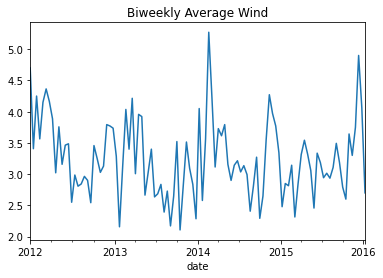

In [77]:
df.resample('2w').wind.mean().plot(title='Biweekly Average Wind')

In [15]:
df['is_sunny'] = df.weather == 'sun'
# NB. previously we did a resample, could also group by date components
df.groupby(['year']).is_sunny.mean().sort_values()

year
2012    0.322404
2015    0.493151
2013    0.561644
2014    0.578082
Name: is_sunny, dtype: float64

In [16]:
df.groupby('month').precipitation.sum().sort_values().tail()

month
01-Jan    466.0
10-Oct    503.4
03-Mar    606.2
12-Dec    622.7
11-Nov    642.5
Name: precipitation, dtype: float64

In [17]:
df['nonzero_precipitation'] = df.precipitation > 0
df.groupby('month').nonzero_precipitation.mean().sort_values().tail()

month
01-Jan    0.532258
03-Mar    0.588710
11-Nov    0.591667
02-Feb    0.646018
12-Dec    0.653226
Name: nonzero_precipitation, dtype: float64

## Flights

In [82]:
df = vega_datasets.data.flights_20k()
df = df.set_index('date')
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND


In [87]:
pd.Series(range(1, 11)).clip(lower=3, upper=7)

0    3
1    3
2    3
3    4
4    5
5    6
6    7
7    7
8    7
9    7
dtype: int64

In [85]:
df.delay.clip(lower=0)

date
2001-01-13 14:56:00    32
2001-01-31 16:40:00     0
2001-02-11 18:39:00     3
2001-01-10 21:00:00     0
2001-03-30 21:45:00     0
                       ..
2001-03-22 15:10:00     4
2001-01-19 13:05:00     0
2001-02-07 11:37:00     0
2001-02-24 16:50:00    42
2001-03-14 11:33:00     0
Name: delay, Length: 20000, dtype: int64

In [81]:
# NB. pandas where and numpy where behave differently!
df.delay = np.where(df.delay < 0, 0, df.delay)

In [20]:
df['hour'] = df.index.hour

In [21]:
df.groupby('hour').delay.mean().sort_values().tail()

hour
22     32.704607
23     65.353846
0     127.916667
1     170.000000
3     302.500000
Name: delay, dtype: float64

In [22]:
df['weekday'] = df.index.strftime('%w-%a')
df.groupby('weekday').delay.mean().sort_values()

weekday
1-Mon     7.165772
6-Sat     8.431498
2-Tue     9.410866
0-Sun    10.413542
3-Wed    11.032478
4-Thu    12.821322
5-Fri    17.757596
Name: delay, dtype: float64

In [23]:
df['month'] = df.index.strftime('%m-%b')
df.groupby('month').delay.mean()

month
01-Jan    11.301592
02-Feb    12.306106
03-Mar     9.875287
Name: delay, dtype: float64

When creating features for weekday or month, prefer:

```python
df['weekday'] = df.index.strftime('%w-%a')
df['month'] = df.index.strftime('%m-%b')
```

this allows us to see not just the number of the month / weekday, but also it's name. In addition, prefixing the name with the number allows the values to be sorted in the propert order for, e.g., visualizations.

In [90]:
df['weekday'] = df.index.day_name()
df.groupby('weekday').delay.mean()

weekday
Friday       15.594452
Monday        3.595973
Saturday      4.667520
Sunday        7.255164
Thursday     10.245766
Tuesday       6.198981
Wednesday     8.161416
Name: delay, dtype: float64

In [91]:
df.index.month

Int64Index([1, 1, 2, 1, 3, 3, 3, 1, 1, 1,
            ...
            3, 2, 3, 3, 1, 3, 1, 2, 2, 3],
           dtype='int64', name='date', length=20000)

In [97]:
df.loc['2001-01-31'].distance.sort_values()

date
2001-01-31 17:05:00     108
2001-01-31 18:50:00     142
2001-01-31 16:15:00     148
2001-01-31 08:25:00     162
2001-01-31 08:05:00     174
                       ... 
2001-01-31 17:00:00    1772
2001-01-31 15:30:00    1797
2001-01-31 06:55:00    1864
2001-01-31 10:05:00    1999
2001-01-31 16:10:00    2277
Name: distance, Length: 203, dtype: int64

In [99]:
# give me the max value of the index values
df.loc['2001-01-31'].distance.index.max()

Timestamp('2001-01-31 23:15:00')

In [98]:
# take the max _value_ and then give the index associated with it
df.loc['2001-01-31'].distance.idxmax()

Timestamp('2001-01-31 16:10:00')

In [100]:
# DONT DO THIS
pd.DataFrame.__repr__ = lambda df: 'some data frame'

In [102]:
# DONT DO THIS
pd.Series.__add__ = lambda *args: 4

In [105]:
df.delay + 1000

4

In [101]:
print(df)

some data frame
